### Table of content

#### 1. Importing library

#### 2. Importing data

#### 3. Data privacy

#### 4. Regional segmentation: Northeast, Midwest, South and West¶

#### 5. Determining spending habits across regions

#### 6. Removing low activity customers

#### 7. Creating new customer profiles

#### 8. Importing department data, creating data dictionary & mapping department id to department

#### 9. Grouping products into different price range

#### 10. Data visualisation based on profile distribution

#### 11. Summary statistics based on customer profile for usage frequency and expenditure

#### 12. Exporting data visualizations

#### 13. Exporting final dataset

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Importing data

In [2]:
# Creating path

path = r"C:\Users\tseki\OneDrive\Documents\Careerfoundry\Data immersion\Achievement 4\Instacart Basket Analysis 8-6-22"

In [3]:
df_combined = pd.read_pickle(os.path.join(path, 'Data', 'Prepared data', 'customers_ords_prods_combined.pkl'))

In [4]:
# Checking shape

df_combined.shape

(32404859, 32)

In [5]:
# Checking columns

df_combined.columns

Index(['user_id', 'First Name', 'Surname', 'Gender', 'STATE', 'Age',
       'date_joined', 'no_of_dependants', 'family_status', 'income',
       'product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'new_customer', 'add_to_cart_order',
       'reordered', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'average_price', 'spending_flag',
       'median_days_since_prior_order', 'frequency_flag', '_merge'],
      dtype='object')

### Data privacy

In [6]:
# Addressing personally identifiable information (PII) and dropping unrequired columns

df_combined.drop(['First Name', 'Surname', '_merge'], axis = 1, inplace = True)

In [7]:
# Checking shape

df_combined.shape

(32404859, 29)

### Regional segmentation: Northeast, Midwest, South and West

In [8]:
# Creating list for each  region

Northeast = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania'
        ,'New Jersey']

Midwest = ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas'
         ,'Minnesota','Iowa','Missouri']

South = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina'
       ,'Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']

West = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon',
      'California','Hawaii']

In [9]:
# Creating loop

result = []

for value in df_combined['STATE']:
    if value in Northeast:
        result.append('Northeast')
    elif value in Midwest:
        result.append('Midwest')
    elif value in South:
        result.append('South')
    else:
        result.append('West')
    
    

In [10]:
# Applying result to new column 'region'

df_combined['Region'] = result

In [11]:
# Checking value count of new column 'Region'

df_combined['Region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: Region, dtype: int64

### Determining spending habits across regions

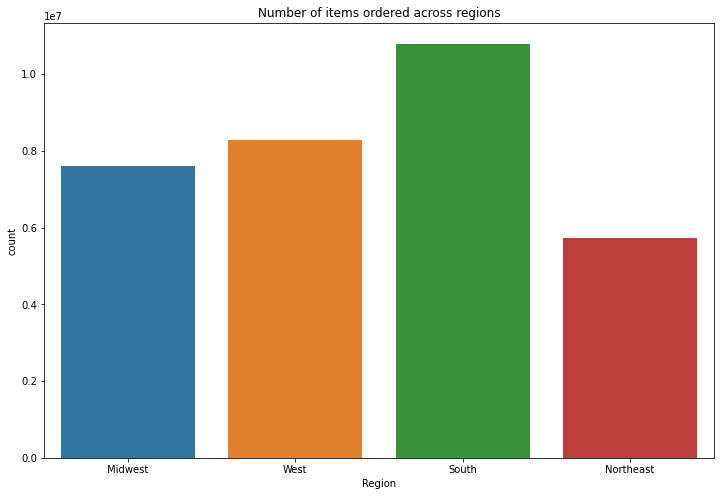

In [12]:
# Creating a bar chart to show number of orders across the Regions

plt.figure(figsize = (12,8))

bar_region_freq2 = sns.countplot(x ='Region', data = df_combined)
plt.title('Number of items ordered across regions')
plt.grid(False)

##### From the above, we see that south has the most orders.

### Removing low activity customers

In [13]:
 ## creating an exclusion flag for low activity customers(customers with less than 5 orders) using .loc

df_combined.loc[df_combined['max_order'] < 5, 'Activity_level'] = 'Low'

In [14]:
df_combined.loc[df_combined['max_order'] >= 5, 'Activity_level'] = 'Regular'

In [15]:
# Checking the value count of new column 'Activity_level'

df_combined['Activity_level'].value_counts(dropna = False)

Regular    30964564
Low         1440295
Name: Activity_level, dtype: int64

In [16]:
# creating dataframe for low activity customers

df_low_activity = df_combined.loc[df_combined['Activity_level'] == 'Low']

In [17]:
# Checking output
pd.set_option('display.max_columns', None)
df_low_activity.head()

,user_id,Gender,STATE,Age,date_joined,no_of_dependants,family_status,income,product_id,product_name,aisle_id,department_id,prices,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,add_to_cart_order,reordered,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_days_since_prior_order,frequency_flag,Region,Activity_level
729,168851,Male,South Carolina,30,1/1/2017,0,single,63712,102,Danish Butter Cookies,61,19,5.500000,1903574,1,2,8,NaN,True,1,0,Regularly busy,Regular orders,3,New customer,7.484375,Low spender,20.5,Non-frequent customer,South,Low
730,168851,Male,South Carolina,30,1/1/2017,0,single,63712,130,Vanilla Milk Chocolate Almond Ice Cream Bars M...,37,1,8.203125,1903574,1,2,8,NaN,True,3,0,Regularly busy,Regular orders,3,New customer,7.484375,Low spender,20.5,Non-frequent customer,South,Low
731,168851,Male,South Carolina,30,1/1/2017,0,single,63712,130,Vanilla Milk Chocolate Almond Ice Cream Bars M...,37,1,8.203125,1193140,2,3,14,15.0,False,2,1,Least busy,Most orders,3,New customer,7.484375,Low spender,20.5,Non-frequent customer,South,Low
732,168851,Male,South Carolina,30,1/1/2017,0,single,63712,130,Vanilla Milk Chocolate Almond Ice Cream Bars M...,37,1,8.203125,1870356,3,1,8,26.0,False,1,1,Busiest day,Regular orders,3,New customer,7.484375,Low spender,20.5,Non-frequent customer,South,Low
733,168851,Male,South Carolina,30,1/1/2017,0,single,63712,196,Soda,77,7,9.000000,1903574,1,2,8,NaN,True,2,0,Regularly busy,Regular orders,3,New customer,7.484375,Low spender,20.5,Non-frequent customer,South,Low


In [18]:
# Exporting low activity customers data

df_low_activity.to_csv(os.path.join(path, 'Data', 'Prepared data', 'low_activity_customers.csv'))

In [19]:
# Dropping low activity customer data

df_combined.drop(df_combined[df_combined['Activity_level'] == 'Low'].index, inplace = True)

In [20]:
# Checking shape

df_combined.shape

(30964564, 31)

### Creating new customer profiles

#### Profile based on age

In [21]:
df_combined['Age'].min()

18

In [22]:
df_combined['Age'].max()

81

In [23]:
df_combined.loc[(df_combined['Age'] >= 18) & (df_combined['Age']<= 35), 'Age Group'] = 'Young adult'

In [24]:
df_combined.loc[(df_combined['Age'] > 35) & (df_combined['Age'] <= 55), 'Age Group'] = 'Middle aged'

In [25]:
df_combined.loc[df_combined['Age'] > 55, 'Age Group'] = 'Older adult'

In [26]:
# checking value count of Age group

df_combined['Age Group'].value_counts(dropna = False)

Older adult    12508298
Middle aged     9717461
Young adult     8738805
Name: Age Group, dtype: int64

#### Profile based on income

In [27]:
df_combined['income'].min()

25903

In [28]:
df_combined['income'].max()

593901

In [29]:
df_combined.loc[df_combined['income'] < 52200, 'Economic class'] = 'Low Earners'

In [30]:
df_combined.loc[(df_combined['income'] >= 52200) & (df_combined['income'] <= 156600), 'Economic class'] = 'Middle Earners'

In [31]:
df_combined.loc[df_combined['income'] > 156600, 'Economic class'] = 'High Earners'

In [32]:
# checking value count of economic class

df_combined['Economic class'].value_counts(dropna = False)

Middle Earners    24541393
Low Earners        3691708
High Earners       2731463
Name: Economic class, dtype: int64

#### Profile based on number of dependents

In [33]:
df_combined.loc[df_combined['no_of_dependants'] == 0, 'dependent_flag'] = 'No dependent'

In [34]:
df_combined.loc[df_combined['no_of_dependants'] > 0, 'dependent_flag'] = 'Parent'

In [35]:
# Checking value count

df_combined['dependent_flag'].value_counts(dropna = False)

Parent          23224883
No dependent     7739681
Name: dependent_flag, dtype: int64

### Importing department data, creating data dictionary & mapping department id to department

In [36]:
# Importing dept data

df_department = pd.read_csv(os.path.join(path, 'Data', 'Prepared data', 'departments_wrangled2.csv'),  index_col = [0])

In [37]:
df_department

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [38]:
# Creating data dictionary

data_dict = dict(zip(df_department['department_id'], df_department['department']))
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [39]:
# checking output

data_dict.get(19)

'snacks'

In [40]:
# Mapping department to department_id in df_combined dataframe

df_combined['department'] = df_combined['department_id'].map(data_dict)

In [41]:
# Checking output

df_combined.head()

,user_id,Gender,STATE,Age,date_joined,no_of_dependants,family_status,income,product_id,product_name,aisle_id,department_id,prices,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,add_to_cart_order,reordered,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_days_since_prior_order,frequency_flag,Region,Activity_level,Age Group,Economic class,dependent_flag,department
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.000000,2543867,5,1,9,30.0,False,2,0,Busiest day,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer,Midwest,Regular,Middle aged,High Earners,Parent,beverages
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.000000,1285508,7,5,15,11.0,False,1,1,Regularly busy,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer,Midwest,Regular,Middle aged,High Earners,Parent,beverages
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.000000,2578584,8,1,15,10.0,False,2,1,Busiest day,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer,Midwest,Regular,Middle aged,High Earners,Parent,beverages
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32,4,4.300781,518967,1,2,9,NaN,True,1,0,Regularly busy,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer,Midwest,Regular,Middle aged,High Earners,Parent,produce
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32,4,4.300781,2524893,3,3,11,30.0,False,2,1,Least busy,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer,Midwest,Regular,Middle aged,High Earners,Parent,produce


In [42]:
# Checking value count

df_combined['department'].value_counts(dropna = False)

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

### Grouping products into different price range

In [144]:
df_combined.loc[df_combined['prices'] <= 5, 'price_range'] = 'Low-range product'

In [145]:
df_combined.loc[(df_combined['prices'] > 5) & (df_combined['prices'] <= 15), 'price_range'] = 'Mid-range product'

In [146]:
df_combined.loc[df_combined['prices'] > 15, 'price_range'] = 'High-range product'

In [147]:
df_combined['price_range'].value_counts(dropna = False)

Mid-range product     20891771
Low-range product      9674840
High-range product      397953
Name: price_range, dtype: int64

In [148]:
df_combined.columns

Index(['user_id', 'Gender', 'STATE', 'Age', 'date_joined', 'no_of_dependants',
       'family_status', 'income', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'order_id', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'new_customer', 'add_to_cart_order', 'reordered', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spending_flag', 'median_days_since_prior_order', 'frequency_flag',
       'Region', 'Activity_level', 'Age_group', 'Economic_class',
       'dependent_flag', 'department', 'price_range'],
      dtype='object')

### Data visualisation based on profile distribution

<Figure size 432x288 with 0 Axes>

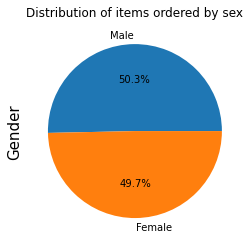

<Figure size 432x288 with 0 Axes>

In [43]:
# Create pie chart of distribution of items ordered by sex

gender_count = df_combined['Gender'].value_counts(dropna = False)

pie_gender = gender_count.plot(kind = 'pie', autopct="%1.1f%%", radius=1)
plt.title("Distribution of items ordered by sex")
plt.ylabel('Gender', fontsize = 15)
plt.figure()


Text(0.5, 1.0, 'Distribution of customers by sex')

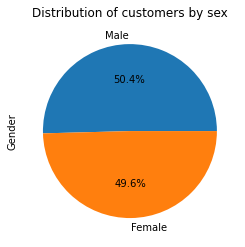

In [44]:
# pie chart showing distribution of customers by sex

unique_customers = df_combined.groupby('user_id').nth(1)

sex_distribution = unique_customers['Gender'].value_counts(dropna = False)

pie_sex_unique = sex_distribution.plot(kind = 'pie', autopct="%1.1f%%")
plt.title("Distribution of customers by sex")

Text(0.5, 1.0, 'Distribution of items ordered by customer loyalty')

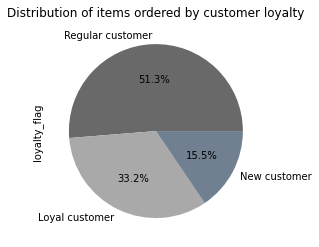

In [45]:
# Create pie chart of distribution of items ordered by customer loyalty

loyalty_count = df_combined['loyalty_flag'].value_counts(dropna = False)

pie_loyalty = loyalty_count.plot(kind = 'pie', autopct="%1.1f%%", colors = ['dimgray', 'darkgray', 'slategrey'])
plt.title("Distribution of items ordered by customer loyalty")

Text(0.5, 1.0, 'Distribution of customers by loyalty')

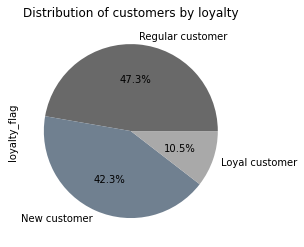

In [46]:
# Create pie chart of customer distribution by loyalty

unique_customers = df_combined.groupby('user_id').nth(1)

loyalty_customers = unique_customers['loyalty_flag'].value_counts(dropna = False)


pie_loyalty_customers = loyalty_customers.plot(kind = 'pie', autopct="%1.1f%%", colors = ['dimgray', 'slategrey', 'darkgray'])
plt.title("Distribution of customers by loyalty")

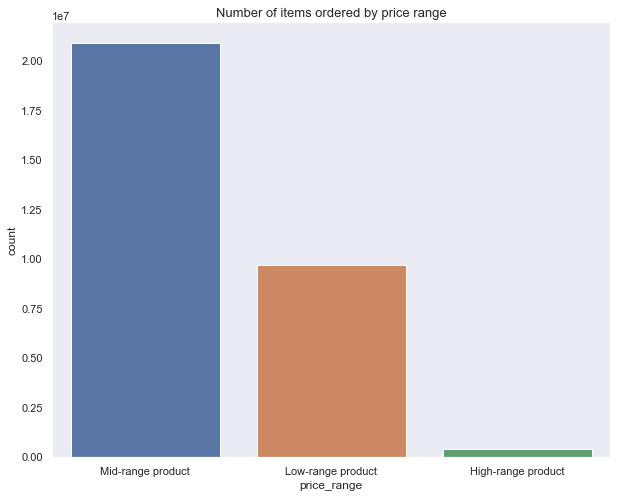

In [150]:
# Creating bar chart to show number of orders across products of different price range

plt.figure(figsize = (10,8))
plt.title('Number of items ordered by price range', fontsize=13)
plt.grid(False)

bar_price_range = sns.countplot(x = 'price_range', data = df_combined)

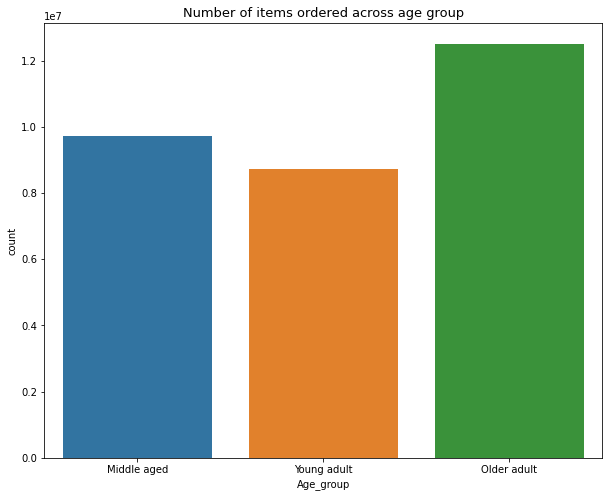

In [49]:
# Creating bar chart to show number of orders across the age groups

plt.figure(figsize = (10,8))
plt.title('Number of items ordered across age group', fontsize=13)
plt.grid(False)

bar_age = sns.countplot(x = 'Age_group', data = df_combined)


In [48]:
# renaming column name

df_combined.rename(columns = {'Age Group' : 'Age_group', 'Economic class' : 'Economic_class'}, inplace = True)

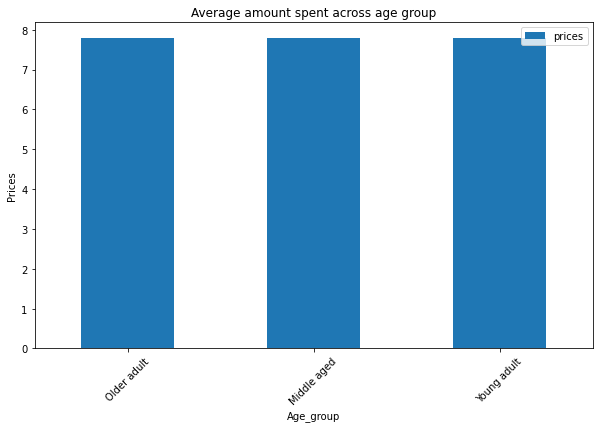

In [50]:
# Bar chart showing the average amount spent across age groups

bar_age_avgprice = df_combined[['Age_group','prices']].groupby('Age_group').mean().sort_values(by='prices',
ascending=False).plot.bar(ylabel = 'Prices', figsize=(10,6),rot=45, title='Average amount spent across age group')

<Figure size 1080x576 with 0 Axes>

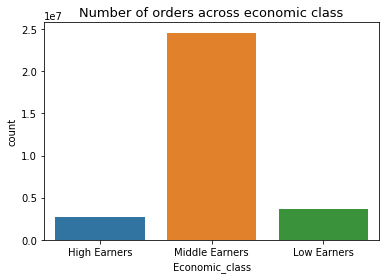

<Figure size 1080x576 with 0 Axes>

In [51]:
# Creating bar chart to show number of orders across economic class

barcount6 = sns.countplot(x ='Economic_class', data=df_combined)

plt.title('Number of orders across economic class', fontsize=13)
plt.figure(figsize = (15,8))

Text(0, 0.5, 'Prices')

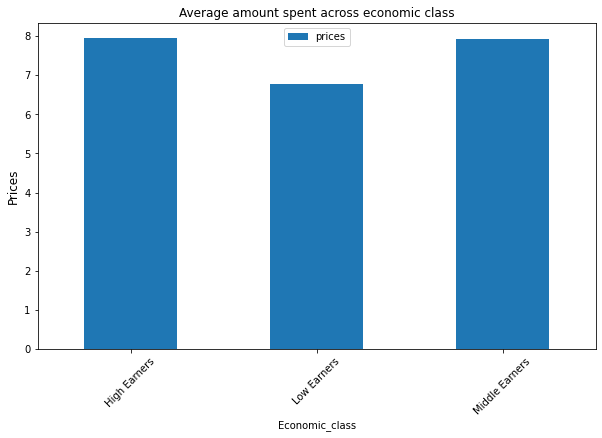

In [52]:
# Bar chart showing the average amount spent by  economic class

bar_class_avgprice = df_combined[['Economic_class','prices']].groupby('Economic_class').mean().plot.bar(figsize=(10,6),
rot=45, title='Average amount spent across economic class')
plt.ylabel('Prices', fontsize = 12)

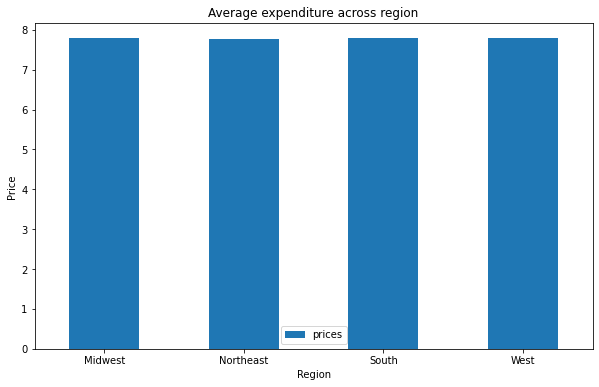

In [53]:
# Average expenditure across region

bar_exp_region1 = df_combined[['Region','prices']].groupby('Region').mean().plot(kind = 'bar', ylabel = 'Price',
rot = 360, figsize=(10,6), title = 'Average expenditure across region')

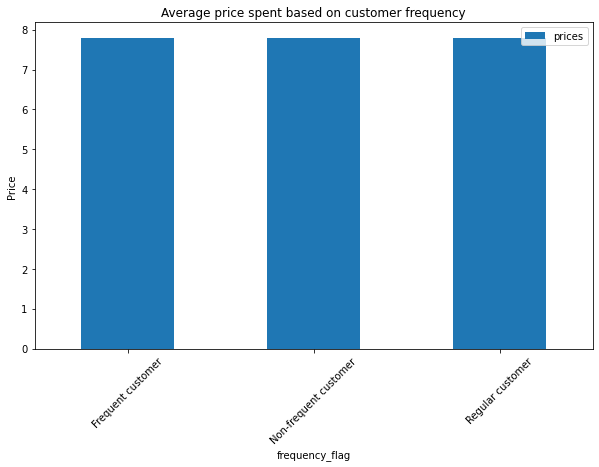

In [54]:
# Average price spent across frequency flag

bar_avgprice_freq = df_combined[['frequency_flag', 'prices']].groupby('frequency_flag').mean().plot.bar(figsize = (10,6),
title = 'Average price spent based on customer frequency', rot = 45, ylabel = 'Price')


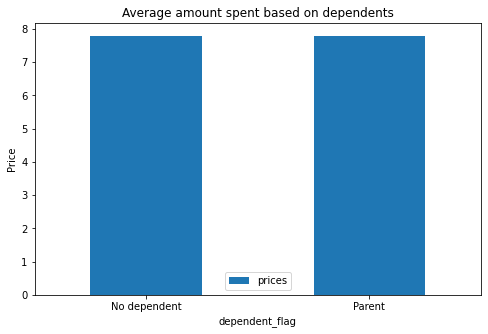

In [55]:
# Average amount spent based on dependents 

bar_avgprice_dependents = df_combined[['dependent_flag', 'prices']].groupby('dependent_flag').mean().plot.bar(figsize = (8,5),
title = 'Average amount spent based on dependents', ylabel = 'Price', rot = 360)

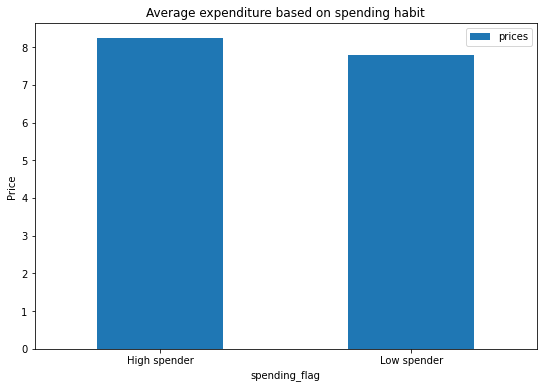

In [56]:
bar_avgprice_spending = df_combined[['spending_flag', 'prices']].groupby('spending_flag').mean().plot.bar(figsize = (9,6),
title = 'Average expenditure based on spending habit', ylabel = 'Price', rot = 360)

Text(0.5, 1.0, 'Number of orders by gender across regions')

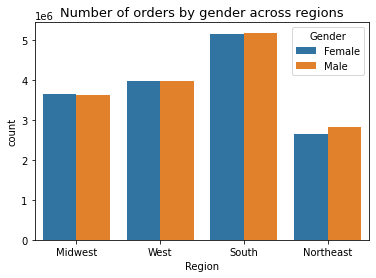

In [57]:
# bar chart showing number of orders by sex across region

barcount1 = sns.countplot(x='Region',hue='Gender', data=df_combined)

plt.title('Number of orders by gender across regions', fontsize=13)

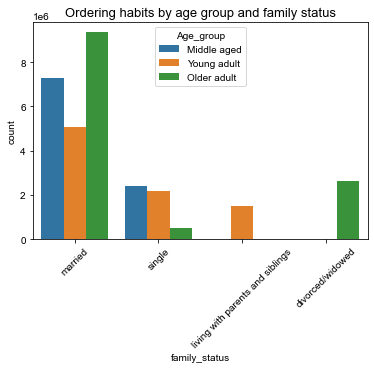

In [58]:
# bar chart showing number of orders by age_group and family status

barcount5 = sns.countplot(x='family_status',hue='Age_group', data=df_combined)

plt.title('Ordering habits by age group and family status', fontsize=13)
plt.xticks(rotation=45)
sns.set(rc = {'figure.figsize':(7,5)})

Text(0.5, 1.0, 'Average expenditure by gender across region')

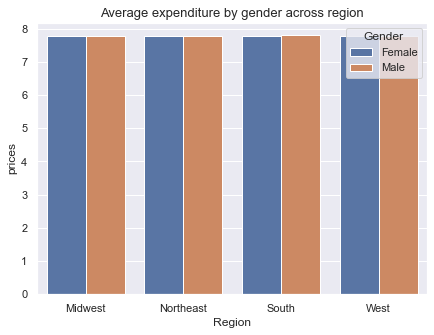

In [59]:
#Bar chart showing average expenditure by gender across region

df = df_combined.groupby(['Region', 'Gender']).prices.agg('mean')
df = df.reset_index()

plot = sns.barplot(x="Region", y='prices', hue="Gender", data=df, ci=0)

plt.title('Average expenditure by gender across region', fontsize=13)



Text(0.5, 1.0, 'Average expenditure by economic class across age groups')

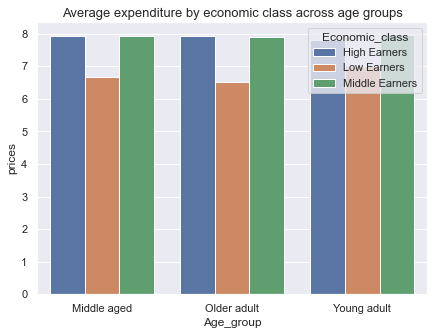

In [60]:
df3 = df_combined.groupby(['Economic_class', 'Age_group']).prices.agg('mean')
df3 = df3.reset_index()

AgeG_Eclass = sns.barplot(x="Age_group", y='prices', hue="Economic_class", data=df3, ci=0)

plt.title('Average expenditure by economic class across age groups', fontsize=13)

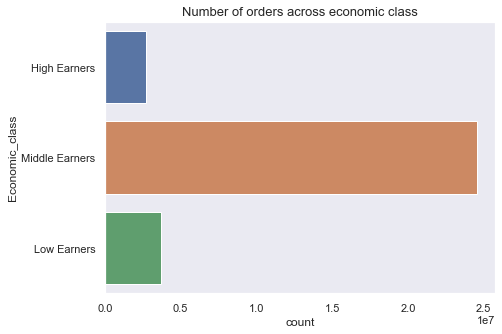

In [61]:
# number of orders across economic class

barcount2 = sns.countplot(y ='Economic_class', data=df_combined)

plt.title('Number of orders across economic class', fontsize=13)
plt.grid(False)

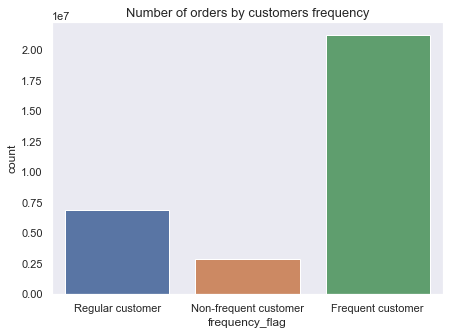

In [62]:
# creating bars charts shows number of orders across frequency flag
barcount7 = sns.countplot(x ='frequency_flag', data=df_combined)

plt.title('Number of orders by customers frequency', fontsize=13)
plt.grid(False)

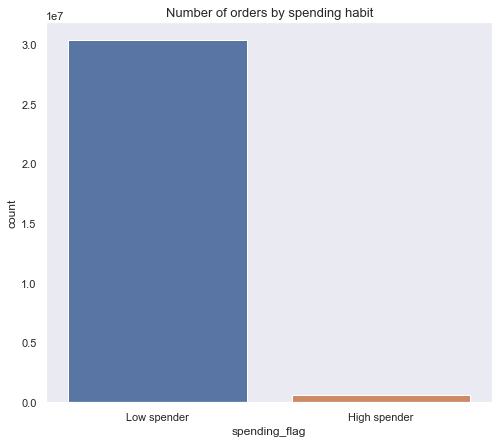

In [77]:
# creating bars charts shows number of orders across spending flag
barcount8 = sns.countplot(x ='spending_flag', data=df_combined)

plt.title('Number of orders by spending habit', fontsize=13)
plt.grid(False)


Text(0.5, 1.0, 'Average expenditure by spending habits across economic class')

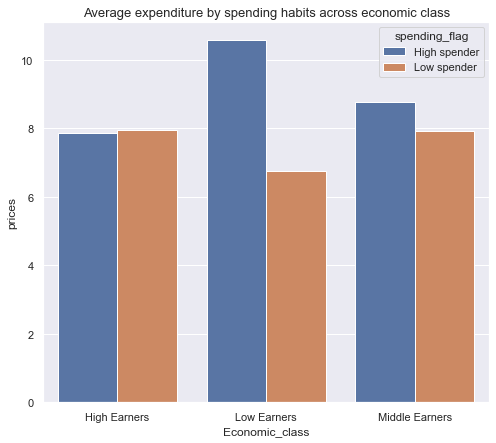

In [78]:
#Bar chart showing average expenditure by spending_flag across economic class

df1 = df_combined.groupby(['Economic_class', 'spending_flag']).prices.agg('mean')
df1 = df1.reset_index()

bar_class_spending = sns.barplot(x="Economic_class", y='prices', hue="spending_flag", data=df1, ci=0)

plt.title('Average expenditure by spending habits across economic class', fontsize=13)


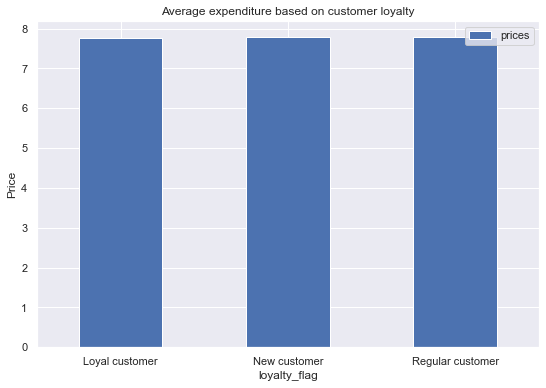

In [79]:
bar_loyalty = df_combined[['loyalty_flag', 'prices']].groupby('loyalty_flag').mean().plot.bar(figsize = (9,6),
title = 'Average expenditure based on customer loyalty', ylabel = 'Price', rot = 360)

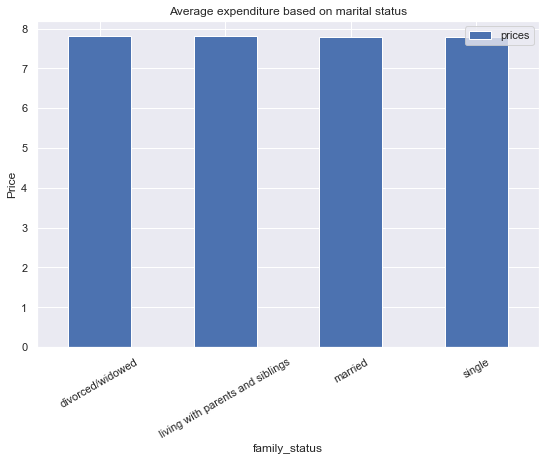

In [80]:
bar_familystatus = df_combined[['family_status', 'prices']].groupby('family_status').mean().plot.bar(figsize = (9,6),
title = 'Average expenditure based on marital status', ylabel = 'Price', rot = 30)

<Figure size 1080x576 with 0 Axes>

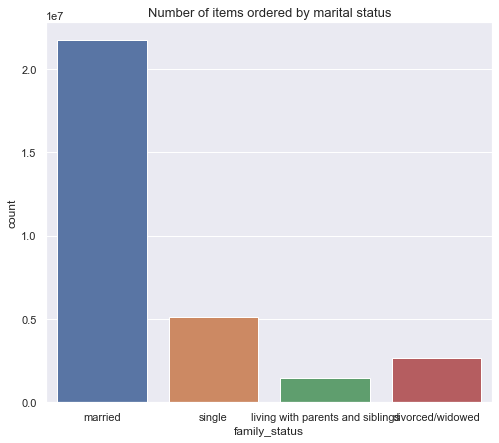

<Figure size 1080x576 with 0 Axes>

In [81]:
# Creating bar chart to show number of item ordered across economic class

barcount7 = sns.countplot(x ='family_status', data=df_combined)

plt.title('Number of items ordered by marital status', fontsize=13)
plt.figure(figsize = (15,8))

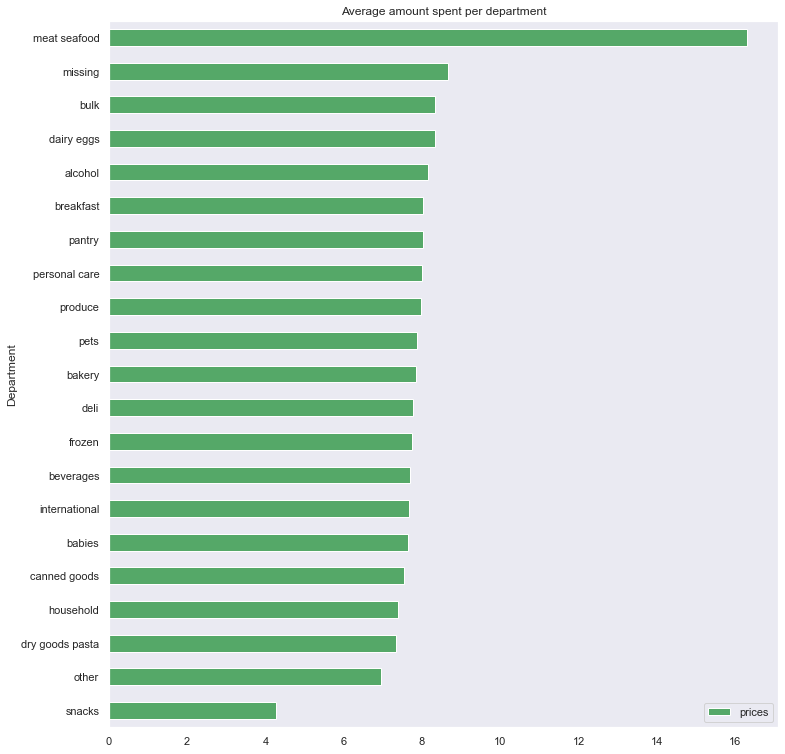

In [82]:
# Average amount spent by a customer per department

bar_department = df_combined[['department', 'prices']].groupby('department').mean().sort_values('prices').plot.barh(figsize = (12,13), title = 'Average amount spent per department', ylabel = 'Price', xlabel = 'Department', color = 'g')

plt.grid(False)

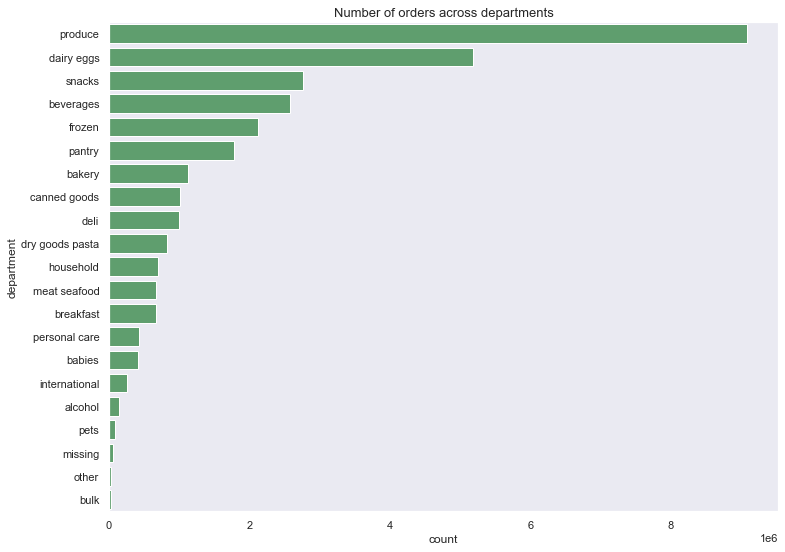

In [83]:
# number of orders across departments

Descending = df_combined.groupby('department').size().sort_values().index[::-1] #for sorting the values

sns.set(rc = {'figure.figsize':(12,9)})
barcount3 = sns.countplot(y ='department', data=df_combined, color = 'g', order=Descending)

plt.title('Number of orders across departments', fontsize=13)
plt.grid(False)


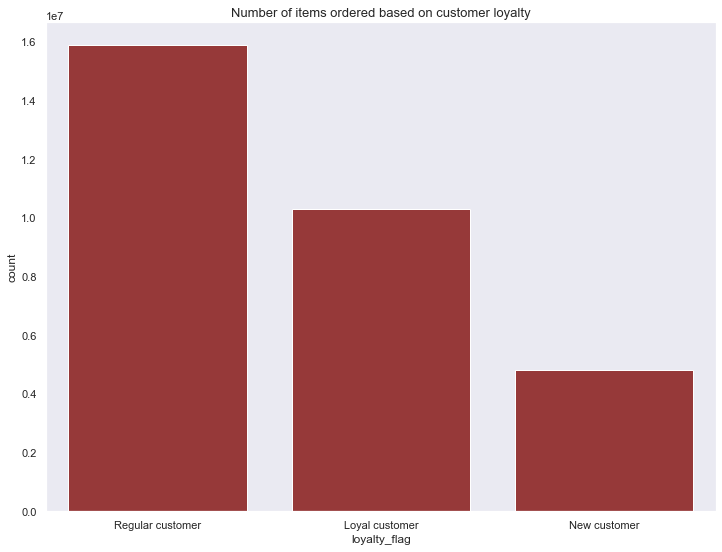

In [84]:
# number of orders based on customer loyalty

Descending = df_combined.groupby('loyalty_flag').size().sort_values().index[::-1] #for sorting the values

barcount4 = sns.countplot(x ='loyalty_flag', data=df_combined, color = 'brown', order=Descending)

plt.title('Number of items ordered based on customer loyalty', fontsize=13)
sns.set(rc = {'figure.figsize':(11,8)})
plt.grid(False)

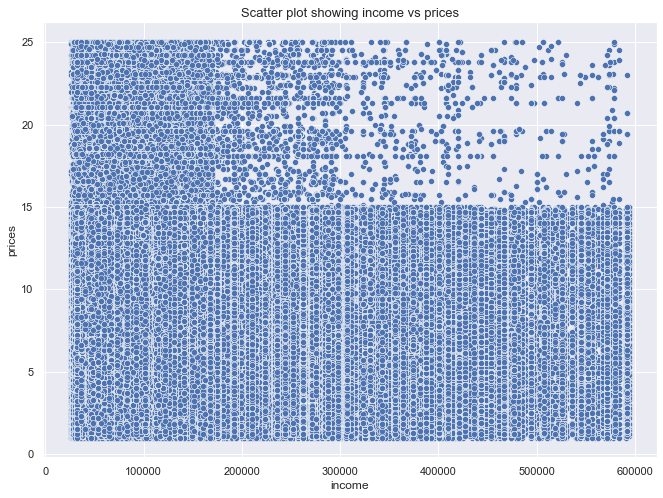

In [85]:
#creating scatterplot of prices and income

plt.title('Scatter plot showing income vs prices', fontsize=13)

plot_prices_income = sns.scatterplot(x = 'income', y = 'prices',data = df_combined)

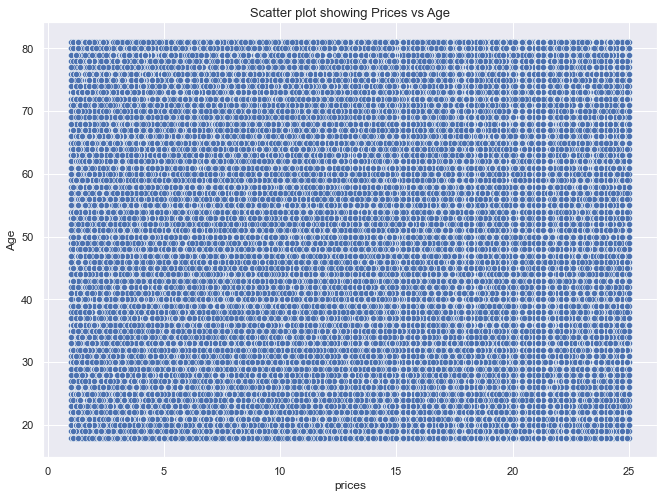

In [86]:
plt.title('Scatter plot showing Prices vs Age', fontsize=13)

plot_Age_prices = sns.scatterplot(x = 'prices', y = 'Age',data = df_combined)

### Summary statistics based on customer profile for usage frequency and expenditure

#### Based on Gender

In [87]:
# Summary stats for usage frequency

df_combined.groupby('Gender').agg({'days_since_prior_order' : ['mean','min', 'max']})

days_since_prior_order           
                         mean  min   max
Gender                                  
Female              10.796875  0.0  30.0
Male                10.828125  0.0  30.0

In [88]:
# Summary stats for expenditure

df_combined.groupby('Gender').agg({'prices' : ['mean', 'min', 'max']})

prices           
            mean  min   max
Gender                     
Female  7.789062  1.0  25.0
Male    7.792969  1.0  25.0

#### Based on Age Group

In [89]:
# Summary stats for usage frequency

df_combined.groupby('Age_group').agg({'days_since_prior_order' : ['mean','min', 'max']})

days_since_prior_order           
                              mean  min   max
Age_group                                    
Middle aged              10.796875  0.0  30.0
Older adult              10.804688  0.0  30.0
Young adult              10.828125  0.0  30.0

In [90]:
# Summary stats for expenditure

df_combined.groupby('Age_group').agg({'prices' : ['mean', 'min', 'max']})

prices           
                 mean  min   max
Age_group                       
Middle aged  7.789062  1.0  25.0
Older adult  7.796875  1.0  25.0
Young adult  7.785156  1.0  25.0

#### Based on marital status

In [91]:
# Summary stats for usage frequency

df_combined.groupby('family_status').agg({'days_since_prior_order' : ['mean','min', 'max']})

days_since_prior_order           
                                                   mean  min   max
family_status                                                     
divorced/widowed                              10.750000  0.0  30.0
living with parents and siblings              10.750000  0.0  30.0
married                                       10.820312  0.0  30.0
single                                        10.812500  0.0  30.0

In [92]:
# Summary stats for expenditure

df_combined.groupby('family_status').agg({'prices' : ['mean', 'min', 'max']})

prices           
                                      mean  min   max
family_status                                        
divorced/widowed                  7.800781  1.0  25.0
living with parents and siblings  7.800781  1.0  25.0
married                           7.789062  1.0  25.0
single                            7.785156  1.0  25.0

#### Based on loyalty

In [93]:
# Summary stats for usage frequency

df_combined.groupby('loyalty_flag').agg({'days_since_prior_order' : ['mean','min', 'max']})

days_since_prior_order           
                                   mean  min   max
loyalty_flag                                      
Loyal customer                 6.027344  0.0  30.0
New customer                  17.593750  0.0  30.0
Regular customer              12.156250  0.0  30.0

In [94]:
# Summary stats for expenditure

df_combined.groupby('loyalty_flag').agg({'prices' : ['mean', 'min', 'max']})

prices           
                      mean  min   max
loyalty_flag                         
Loyal customer    7.773438  1.0  25.0
New customer      7.800781  1.0  25.0
Regular customer  7.796875  1.0  25.0

#### Based on spending habit

In [95]:
# Summary stats for usage frequency

df_combined.groupby('spending_flag').agg({'days_since_prior_order' : ['mean','min', 'max']})

days_since_prior_order           
                                mean  min   max
spending_flag                                  
High spender               10.484375  0.0  30.0
Low spender                10.820312  0.0  30.0

In [96]:
# Summary stats for expenditure

df_combined.groupby('spending_flag').agg({'prices' : ['mean', 'min', 'max']})

prices           
                   mean  min   max
spending_flag                     
High spender   8.234375  1.0  25.0
Low spender    7.781250  1.0  25.0

#### Based on frequency flag

In [97]:
# Summary stats for usage frequency

df_combined.groupby('frequency_flag').agg({'days_since_prior_order' : ['mean','min', 'max']})

days_since_prior_order           
                                        mean  min   max
frequency_flag                                         
Frequent customer                   7.859375  0.0  30.0
Non-frequent customer              22.796875  0.0  30.0
Regular customer                   15.531250  0.0  30.0

In [98]:
# Summary stats for expenditure

df_combined.groupby('frequency_flag').agg({'prices' : ['mean', 'min', 'max']})

prices           
                           mean  min   max
frequency_flag                            
Frequent customer      7.789062  1.0  25.0
Non-frequent customer  7.781250  1.0  25.0
Regular customer       7.792969  1.0  25.0

#### Based on Region

In [99]:
# Summary stats for usage frequency

df_combined.groupby('Region').agg({'days_since_prior_order' : ['mean','min', 'max']})

days_since_prior_order           
                            mean  min   max
Region                                     
Midwest                10.890625  0.0  30.0
Northeast              10.773438  0.0  30.0
South                  10.812500  0.0  30.0
West                   10.757812  0.0  30.0

In [100]:
# Summary stats for expenditure

df_combined.groupby('Region').agg({'prices' : ['mean', 'min', 'max']})

prices           
               mean  min   max
Region                        
Midwest    7.792969  1.0  25.0
Northeast  7.781250  1.0  25.0
South      7.792969  1.0  25.0
West       7.789062  1.0  25.0

#### Based on Economic class

In [101]:
# Summary stats for usage frequency

df_combined.groupby('Economic_class').agg({'days_since_prior_order' : ['mean','min', 'max']})

days_since_prior_order           
                                 mean  min   max
Economic_class                                  
High Earners                10.664062  0.0  30.0
Low Earners                 11.148438  0.0  30.0
Middle Earners              10.773438  0.0  30.0

In [102]:
# Summary stats for expenditure

df_combined.groupby('Economic_class').agg({'prices' : ['mean', 'min', 'max']})

prices           
                    mean  min   max
Economic_class                     
High Earners    7.937500  1.0  25.0
Low Earners     6.765625  1.0  25.0
Middle Earners  7.929688  1.0  25.0

#### Based on dependent flag

In [103]:
# Summary stats for usage frequency

df_combined.groupby('dependent_flag').agg({'days_since_prior_order' : ['mean','min', 'max']})

days_since_prior_order           
                                 mean  min   max
dependent_flag                                  
No dependent                10.789062  0.0  30.0
Parent                      10.820312  0.0  30.0

In [104]:
# Summary stats for expenditure

df_combined.groupby('dependent_flag').agg({'prices' : ['mean', 'min', 'max']})

prices           
                    mean  min   max
dependent_flag                     
No dependent    7.789062  1.0  25.0
Parent          7.789062  1.0  25.0

#### Based on department

In [105]:
# Summary stats for expenditure

df_combined.groupby('department').agg({'prices' : ['mean', 'min', 'max']})

prices                     
                      mean       min        max
department                                     
alcohol           8.148438  1.000000  15.000000
babies            7.632812  1.000000  15.000000
bakery            7.855469  1.000000  15.000000
beverages         7.683594  1.000000  15.000000
breakfast         8.031250  1.000000  14.898438
bulk              8.343750  1.400391  14.101562
canned goods      7.546875  1.000000  15.000000
dairy eggs        8.335938  1.000000  15.000000
deli              7.781250  1.000000  15.000000
dry goods pasta   7.347656  1.000000  15.000000
frozen            7.734375  1.000000  15.000000
household         7.378906  1.000000  15.000000
international     7.679688  1.000000  15.000000
meat seafood     16.296875  8.000000  25.000000
missing           8.664062  1.000000  15.000000
other             6.960938  1.099609  15.000000
pantry            8.015625  1.000000  20.000000
personal care     8.000000  1.000000  15.000000
pets              7.886719  1.000000  15.000000
produce           7.980469  1.000000  15.000000
snacks            4.277344  1.599609   7.000000

In [152]:
df_combined.columns

Index(['user_id', 'Gender', 'STATE', 'Age', 'date_joined', 'no_of_dependants',
       'family_status', 'income', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'order_id', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'new_customer', 'add_to_cart_order', 'reordered', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spending_flag', 'median_days_since_prior_order', 'frequency_flag',
       'Region', 'Activity_level', 'Age_group', 'Economic_class',
       'dependent_flag', 'department', 'price_range'],
      dtype='object')

### Exporting data visualizations

In [107]:
bar_region_freq2.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'bar_region_freq2.png'))

In [151]:
bar_price_range.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'bar_price_range.png'))

In [108]:
bar_age.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'bar_age.png'))

In [109]:
bar_age_avgprice.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'bar_age_avgprice.png'))

In [110]:
bar_age.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'economic_class_freq.png'))

In [111]:
bar_class_avgprice.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'economic_class_avgprice.png'))

In [112]:
bar_exp_region1.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'avgprice_region.png'))

In [113]:
bar_avgprice_freq.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'avgprice_freqflag.png'))

In [114]:
bar_avgprice_dependents.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'avgprice_dependents.png'))

In [115]:
bar_avgprice_spending.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'avgprice_spending.png'))

In [116]:
barcount1.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'gender_region_freq.png'))

In [117]:
barcount5.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'familystatus_agegroup_freq.png'))

In [118]:
plot.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'avgprice_gender_region.png'))

In [119]:
AgeG_Eclass.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'AgeG_Eclass.png'))

In [120]:
barcount2.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'economic_class_freq.png'))

In [121]:
bar_class_spending.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'economic_class_spending_flag_avgprice.png'))

In [122]:
bar_loyalty.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'loyalty_flag_avgprice.png'))

In [123]:
bar_familystatus.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'family_status_avgprice.png'))

In [124]:
barcount7.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'family_status_count.png'))

In [125]:
bar_department.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'dep_avgprice.png'))

In [126]:
barcount3.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'dep_freq.png'))

In [127]:
barcount4.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'loyalty_flag_freq.png'))

In [128]:
pie_gender.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'pie_gender.png'))

In [129]:
pie_sex_unique.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'pie_sex_unique.png'))

In [130]:
pie_loyalty.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'pie_loyalty.png'))

In [131]:
pie_loyalty_customers.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'pie_loyalty_customers.png'))

In [132]:
plot_prices_income.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'plot_prices_income.png'))

In [133]:
plot_Age_prices.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'plot_Age_prices.png'))

In [134]:
barcount7.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'frequency_flag_count.png'))

In [135]:
barcount8.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'spending_flag_count.png'))

### Exporing final dataset

In [153]:
df_combined.to_pickle(os.path.join(path, 'Data', 'Prepared data', 'df_combined_final.pkl'))